In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt


In [2]:
# import something
master_df = pd.read_csv('../datasets/MASTER_DF.csv')

Index(['entry', 'product', 'reacts', 'PubChem', 'SMILES', 'Mol', 'Fingerprint',
       'dist', 'enzyme_class_1', 'enzyme_class_2', 'enzyme_class_3',
       'enzyme_class_4', 'enzyme_class_5', 'enzyme_class_6', 'enzyme_class_7',
       'n_C', 'n_H', 'n_O', 'n_N', 'n_P', 'n_S', 'n_X', 'DoU', 'MW'],
      dtype='object')

In [3]:
feature_df = master_df[['PubChem', 'dist', 'enzyme_class_1', 'enzyme_class_2', 'enzyme_class_3',
       'enzyme_class_4', 'enzyme_class_5', 'enzyme_class_6', 'enzyme_class_7',
        'n_O', 'n_N', 'n_P', 'n_S', 'n_X', 'DoU']]
feature_df.set_index(keys=['PubChem'], inplace=True)
feature_df.head()

,dist,enzyme_class_1,enzyme_class_2,enzyme_class_3,enzyme_class_4,enzyme_class_5,enzyme_class_6,enzyme_class_7,n_O,n_N,n_P,n_S,n_X,DoU
PubChem,,,,,,,,,,,,,,
3394,0.000000,1,0,0,0,0,0,0,3.0,0.0,0.0,1.0,0.0,0.0
3394,0.511007,1,0,0,0,0,0,0,3.0,0.0,0.0,1.0,0.0,0.0
3578,0.000000,1,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
3578,0.241667,0,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
3578,0.294605,0,0,0,1,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0


In [4]:
full_feature = master_df[['dist', 'enzyme_class_1', 'enzyme_class_2', 'enzyme_class_3',
       'enzyme_class_4', 'enzyme_class_5', 'enzyme_class_6', 'enzyme_class_7',
       'n_C', 'n_H', 'n_O', 'n_N', 'n_P', 'n_S', 'n_X', 'DoU', 'MW']]
full_feature.head()

full_features = np.array(full_feature) #shape balance array for regression
full_reactions = list(master_df['reacts'])

full_feature_train, full_feature_test, full_reaction_train, full_reaction_test = train_test_split(full_features, full_reactions,
                                                    test_size=0.20, random_state=42)

In [5]:
features = np.array(feature_df) #shape balance array for regression
reactions = list(master_df['reacts'])

feature_train, feature_test, reaction_train, reaction_test = train_test_split(features, reactions,
                                                    test_size=0.20, random_state=42)

In [10]:
model_1 = linear_model.LogisticRegression(solver='liblinear', penalty='l1', random_state=1, class_weight='balanced')
model_1.fit(feature_train, np.ravel(reaction_train))

predictions = model_1.predict(feature_test) # change me to the data you want to predict based on 

score = model_1.score(feature_test, reaction_test)
pred = model_1.predict_proba(feature_test)

score, pred

(0.9200581395348837, array([[0.97567184, 0.02432816],
        [0.58845931, 0.41154069],
        [0.91923651, 0.08076349],
        ...,
        [0.68742977, 0.31257023],
        [0.75808899, 0.24191101],
        [0.98838878, 0.01161122]]), array([-3.69149187, -0.35759988, -2.43201839, ..., -0.78813049,
        -1.14223086, -4.44410399]))

In [11]:
prediction_values = pd.DataFrame(pred)
model_descriptive_df = pd.DataFrame()
model_descriptive_df['0']=prediction_values[0]
model_descriptive_df['1']=prediction_values[1]
model_descriptive_df.head()

,0,1
0,0.975672,0.024328
1,0.588459,0.411541
2,0.919237,0.080763
3,0.993312,0.006688
4,0.964063,0.035937


In [8]:
updated = predictions.tolist()
confusion_matrix = confusion_matrix(reaction_test, updated)
print(confusion_matrix)
# upper left and lower right are correct predictions
# lower left and upper right are incorrect predictions 

[[1007   57]
 [  53  259]]


In [9]:
print(classification_report(reaction_test, predictions))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      1064
         1.0       0.82      0.83      0.82       312

   micro avg       0.92      0.92      0.92      1376
   macro avg       0.88      0.89      0.89      1376
weighted avg       0.92      0.92      0.92      1376



C:\Users\ellie\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


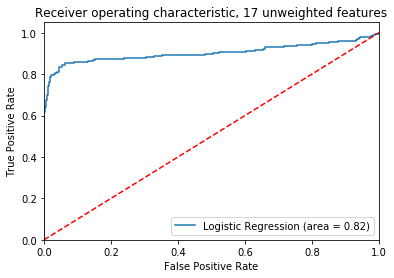

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      1064
         1.0       0.97      0.64      0.77       312

   micro avg       0.91      0.91      0.91      1376
   macro avg       0.94      0.82      0.86      1376
weighted avg       0.92      0.91      0.91      1376
 Score =  0.9149709302325582


In [16]:
# logistic regression on default unweighted 17 features

logreg1=linear_model.LogisticRegression(random_state=1)        
logreg1.fit(full_feature_train, np.ravel(full_reaction_train)) 
score = logreg1.score(full_feature_test, full_reaction_test)

predictions1 = logreg1.predict(full_feature_test)

logit_roc_auc = roc_auc_score(full_reaction_test, logreg1.predict(full_feature_test))
fpr, tpr, thresholds = roc_curve(full_reaction_test, logreg1.predict_proba(full_feature_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic, 17 unweighted features')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

print(classification_report(full_reaction_test, predictions1), 'Score = ', score)


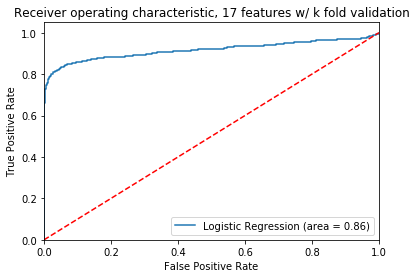

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      5410
         1.0       0.97      0.73      0.84      1469

   micro avg       0.94      0.94      0.94      6879
   macro avg       0.95      0.86      0.90      6879
weighted avg       0.94      0.94      0.94      6879
 Score =  0.9387992440761739


In [19]:
# k fold cross validation
# need to create new features without train/test split

cv_features = master_df.iloc[:,7:24]
cv_features = np.array(cv_features) #shape balance array for regression
cv_reactions = list(master_df['reacts'])

model_2 = linear_model.LogisticRegressionCV(solver='liblinear', penalty='l1', random_state=1, cv=10, max_iter=1000)
model_2.fit(cv_features, np.ravel(cv_reactions))
predictions2 = model_2.predict(cv_features)
score2 = model_2.score(cv_features, cv_reactions)

logit_roc_auc = roc_auc_score(cv_reactions, model_2.predict(cv_features))
fpr, tpr, thresholds = roc_curve(cv_reactions, model_2.predict_proba(cv_features)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic, 17 features w/ k fold validation')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

print(classification_report(cv_reactions, predictions2), 'Score = ', score2)

C:\Users\ellie\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


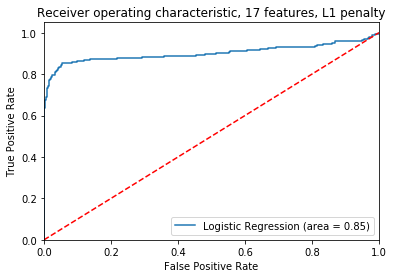

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      1064
         1.0       0.96      0.70      0.81       312

   micro avg       0.93      0.93      0.93      1376
   macro avg       0.94      0.85      0.88      1376
weighted avg       0.93      0.93      0.92      1376
 Score =  0.9265988372093024


In [22]:
logreg5 = linear_model.LogisticRegression(penalty='l1', random_state=1)
logreg5.fit(full_feature_train, np.ravel(full_reaction_train))

predictions5 = logreg5.predict(full_feature_test)
score5 = logreg5.score(full_feature_test, full_reaction_test)

logit_roc_auc = roc_auc_score(full_reaction_test, logreg5.predict(full_feature_test))
fpr, tpr, thresholds = roc_curve(full_reaction_test, logreg5.predict_proba(full_feature_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic, 17 features, L1 penalty')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

print(classification_report(full_reaction_test, predictions5), 'Score = ', score5)

In [ ]:
# model after dropping 3 features
rfe_results14 = pd.DataFrame(columns=['score']) 

rank_array14 = np.zeros((14,15))

for i in range(1,14):
    logreg2=linear_model.LogisticRegression(solver='liblinear', penalty='l1', random_state=1, max_iter=1000, class_weight='balanced') 

    rfe = RFE(logreg2, i)
    rfe = rfe.fit(feature_train, np.ravel(reaction_train))
    score = rfe.score(feature_test, reaction_test)

    rfe_results14.loc[i, 'score'] = score
    for j in range(0,14):  
        rank_array14[i, j] = rfe.ranking_[j]
        
        
rank_df14 = pd.DataFrame(rank_array14, columns=['dist', 'enzyme_class_1', 'enzyme_class_2', 'enzyme_class_3',
       'enzyme_class_4', 'enzyme_class_5', 'enzyme_class_6', 'enzyme_class_7',
       'n_O', 'n_N', 'n_P', 'n_S', 'n_X', 'DoU', 'drop'])
#rfe_results
rank_df14.drop(rank_df.index[0], inplace=True)
rank_df14.drop(['drop'], axis=1, inplace=True)
rank_df14.sum(axis=0), rfe_results # lower score is better

In [8]:
# model with all 17 features
rfe_results17 = pd.DataFrame(columns=['score']) 

rank_array17 = np.zeros((17,18))

for i in range(1,17):
    logreg2=linear_model.LogisticRegression(solver='liblinear', penalty='l1', random_state=1, max_iter=1000, class_weight='balanced') 

    rfe = RFE(logreg2, i)
    rfe = rfe.fit(full_feature_train, np.ravel(full_reaction_train))
    score = rfe.score(full_feature_test, full_reaction_test)

    rfe_results17.loc[i, 'score'] = score
    for j in range(0,17):  
        rank_array17[i, j]= rfe.ranking_[j]

rank_df17 = pd.DataFrame(rank_array, columns=['dist', 'class_1', 'class_2', 'class_3',
       'class_4', 'class_5', 'class_6', 'class_7',
       'n_C', 'n_H', 'n_O', 'n_N', 'n_P', 'n_S', 'n_X', 'DoU', 'MW', 'drop'])
#rfe_results
rank_df17.drop(rank_df.index[0], inplace=True)
rank_df17.drop(['drop'], axis=1, inplace=True)
make_df17 = pd.DataFrame(rank_df.sum(axis=0), columns=['score'])
make_df17.sort_values('score', axis=0, inplace=True)

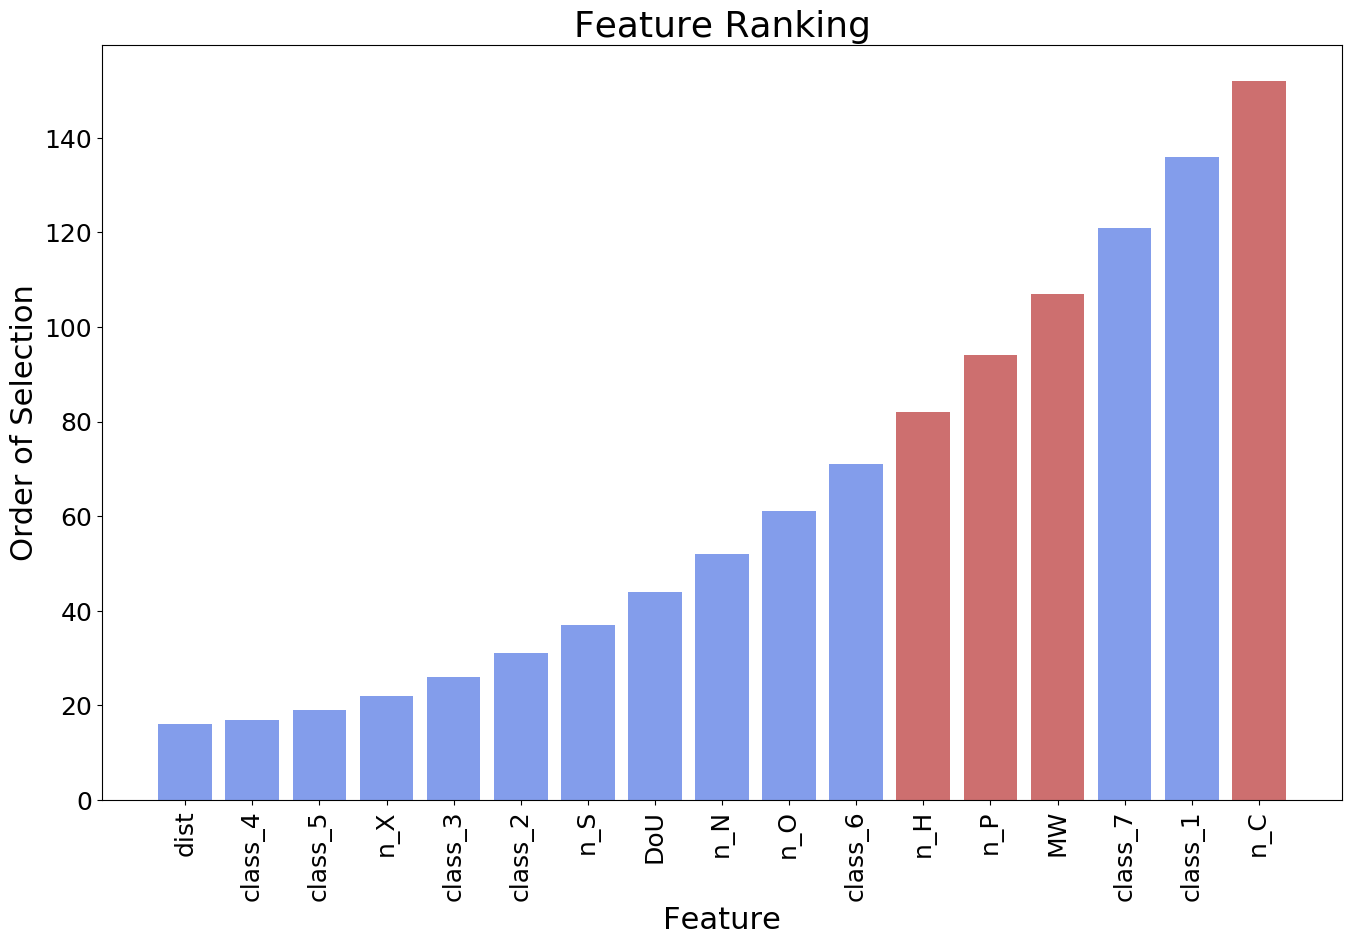

In [12]:
# plot of model feature importance with all 17
a = 'firebrick'
b = 'royalblue'
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 100)
ax.bar(x=make_df.index, y=0, height=make_df.score, color=[b,b,b,b,b,b,b,b,b,b,b,a,a,a,b,b,a], alpha=0.65, linewidth=18)
ax.set_title('Feature Ranking', fontsize=26)
ax.set_ylabel('Order of Selection', fontsize=22)
ax.set_xlabel('Feature', fontsize=22)
ax.set_xticklabels(labels=make_df.index, fontsize=18, rotation='vertical')
ax.set_yticklabels(labels=['0','20','40','60','80','100','120','140'],fontsize=18)

plt.show()
fig.savefig('Feature Rankings.png')

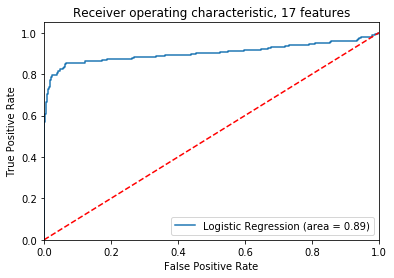

In [7]:
# roc/auc for 17 feature model
logreg17 = linear_model.LogisticRegression(solver='liblinear', penalty='l1', random_state=1, class_weight='balanced')
logreg17.fit(full_feature_train, np.ravel(full_reaction_train))

logit_roc_auc = roc_auc_score(full_reaction_test, logreg17.predict(full_feature_test))

fpr, tpr, thresholds = roc_curve(full_reaction_test, logreg17.predict_proba(full_feature_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic, 17 features')
plt.legend(loc="lower right")

#plt.savefig('Log_ROC_17')
plt.show()

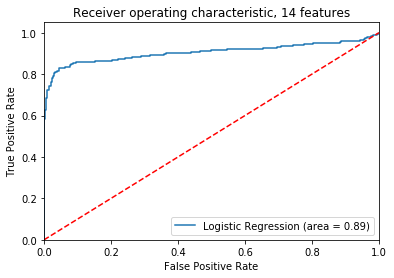

In [8]:
# roc/auc for 14 feature model
logreg14 = linear_model.LogisticRegression(solver='liblinear', penalty='l1', random_state=1, class_weight='balanced')
logreg14.fit(feature_train, np.ravel(reaction_train))

logit_roc_auc = roc_auc_score(reaction_test, logreg14.predict(feature_test))

fpr, tpr, thresholds = roc_curve(reaction_test, logreg14.predict_proba(feature_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic, 14 features')
plt.legend(loc="lower right")

#plt.savefig('Log_ROC_14')
plt.show()

In [12]:
# select all features that are not the enzyme class
non_enzyme_feature_df = master_df.iloc[:,7:24]
non_enzyme_feature_df.drop(['enzyme_class_1', 'enzyme_class_2', 'enzyme_class_3',
       'enzyme_class_4', 'enzyme_class_5', 'enzyme_class_6', 'enzyme_class_7'], axis=1, inplace=True)

non_enzyme_features = np.array(non_enzyme_feature_df) #shape balance array for regression
reactions = list(master_df['reacts'])

non_enzyme_feature_train, non_enzyme_feature_test, reaction_train, reaction_test = train_test_split(non_enzyme_features, reactions,
                                                  test_size=0.20, random_state=42)

,dist,n_C,n_H,n_O,n_N,n_P,n_S,n_X,DoU,MW
0,0.000000,0.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,82.080
1,0.511007,0.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,82.080
2,0.000000,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,34.083
3,0.241667,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,34.083
4,0.294605,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,34.083
5,0.000000,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,34.083
6,0.250848,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,34.083
7,0.537334,5.0,9.0,4.0,1.0,0.0,0.0,0.0,2.0,147.130
8,0.618839,5.0,9.0,4.0,1.0,0.0,0.0,0.0,2.0,147.130
9,0.534192,5.0,9.0,4.0,1.0,0.0,0.0,0.0,2.0,147.130


In [ ]:
# RFE with all features except enzyme class
non_enzyme_rfe_results = pd.DataFrame(columns=['score']) 

non_enzyme_rank_array = np.zeros((11,11))

for i in range(1,11):
    logreg2=linear_model.LogisticRegression(solver='liblinear', penalty='l1', random_state=1, max_iter=1000, class_weight='balanced') 

    rfe = RFE(logreg2, i)
    rfe = rfe.fit(feature_train, np.ravel(reaction_train))
    score = rfe.score(feature_test, reaction_test)

    non_enzyme_rfe_results.loc[i, 'score'] = score
    for j in range(0,10):  
        non_enzyme_rank_array[i, j] = rfe.ranking_[j]

non_enzyme_rank_df = pd.DataFrame(non_enzyme_rank_array, columns=['dist',
       'n_C', 'n_H', 'n_O', 'n_N', 'n_P', 'n_S', 'n_X', 'DoU', 'MW', 'drop'])
#rfe_results

non_enzyme_rank_df.drop(non_enzyme_rank_df.index[0], inplace=True)
non_enzyme_rank_df.drop(['drop'], axis=1, inplace=True)

non_enzyme_rank_df.sum(axis=0)
# ditch n_N, MW, n_H, n_P

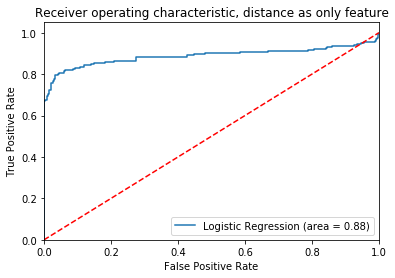

0.9265988372093024

In [26]:
# distance as the only feature
dist = list(master_df['dist']) #shape balance array for regression
dist_reactions = list(master_df['reacts'])

dist_train, dist_test, dist_r_train, dist_r_test = train_test_split(dist, dist_reactions,
                                                  test_size=0.20, random_state=42)

a = len(dist_train)
b = len(dist_r_train)
dist_train = np.reshape(dist_train, (a, 1))
dist_test = np.reshape(dist_test, (b,1))

dist_only_model=linear_model.LogisticRegression(solver='liblinear', penalty='l1', random_state=1, max_iter=1000, class_weight='balanced') 

dist_only_model.fit(dist_train, np.ravel(dist_r_train))

predictions = dist_only_model.predict(dist_test) # change me to the data you want to predict based on 

score = dist_only_model.score(dist_test, dist_r_test)

logit_roc_auc = roc_auc_score(reaction_test, dist_only_model.predict(dist_test))
fpr, tpr, thresholds = roc_curve(reaction_test, dist_only_model.predict_proba(dist_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic, distance as only feature')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

score
        

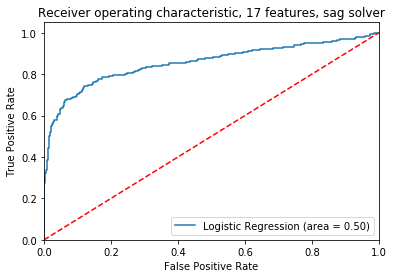

              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87      1064
         1.0       0.00      0.00      0.00       312

   micro avg       0.77      0.77      0.77      1376
   macro avg       0.39      0.50      0.44      1376
weighted avg       0.60      0.77      0.67      1376



C:\Users\ellie\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
# all features, change the solver
logreg3 = linear_model.LogisticRegression(solver='sag', max_iter=100000)
logreg3.fit(full_feature_train, np.ravel(full_reaction_train))
predictions3 = logreg3.predict(full_feature_test)

logit_roc_auc = roc_auc_score(full_reaction_test, logreg3.predict(full_feature_test))
fpr, tpr, thresholds = roc_curve(full_reaction_test, logreg3.predict_proba(full_feature_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic, 17 features, sag solver')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

print(classification_report(full_reaction_test, predictions3))

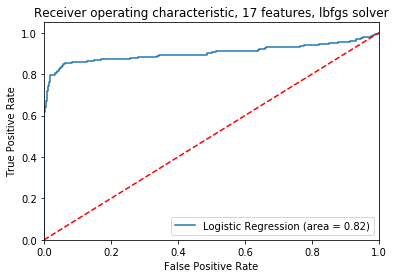

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      1064
         1.0       0.97      0.65      0.78       312

   micro avg       0.92      0.92      0.92      1376
   macro avg       0.94      0.82      0.87      1376
weighted avg       0.92      0.92      0.91      1376



In [28]:
# all features, change the solver 
logreg4 = linear_model.LogisticRegression(solver='lbfgs', max_iter=100000)
logreg4.fit(full_feature_train, np.ravel(full_reaction_train))
predictions4 = logreg4.predict(full_feature_test)

logit_roc_auc = roc_auc_score(full_reaction_test, logreg4.predict(full_feature_test))
fpr, tpr, thresholds = roc_curve(full_reaction_test, logreg4.predict_proba(full_feature_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic, 17 features, lbfgs solver')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

print(classification_report(full_reaction_test, predictions4))

* solvers
* features
* rfe
* plot ROCs 